# Übung

## Aufgabe 6.1

Das Schiff Titanic galt bei seiner Fertigstellung als unsinkbar. 1912
kollidierte die Titanic mit einem Eisberg und sank. Bei dem Unglück kamen 1514
von 2220 Personen ums Leben, so dass der Titanic-Untergang zu den größten
Unglücken der Schifffahrt zählt. Mehr Informationen zu der Titanic finden Sie
bei Wikipedia
[https://de.wikipedia.org/wiki/Titanic_(Schiff)](https://de.wikipedia.org/wiki/Titanic_(Schiff)).

In der folgenden Übung werden Passagierlisten der Titanic benutzt, um die
Überlebenswahrscheinlichkeit zu prognostizieren (0 = gestorben, 1 = überlebt),
deren Quelle hier ist:
[https://www.kaggle.com/c/titanic](https://www.kaggle.com/c/titanic).

Laden sie den Datensatz 'titanic_DE_cleaned.csv'.

Führen Sie eine explorative Datenanalyse (EDA) durch. Führen Sie dazu
Python-Code in Code-Zellen aus und geben Sie in Markdown-Zellen Ihre Antworten
auf die folgenden Frage an.

1. Welche Daten enthält der Datensatz? Wie viele Personen sind in der Tabelle
   enthalten? Wie viele Merkmale werden dort beschrieben?

In [1]:
import pandas as pd 
daten = pd.read_csv('titanic_DE_cleaned.csv')

daten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ueberlebt                   183 non-null    int64  
 1   Klasse                      183 non-null    int64  
 2   Name                        183 non-null    object 
 3   Geschlecht                  183 non-null    object 
 4   Alter                       183 non-null    float64
 5   Anzahl_Geschwister_Partner  183 non-null    int64  
 6   Anzahl_Eltern_Kinder        183 non-null    int64  
 7   Ticket                      183 non-null    object 
 8   Ticketpreis                 183 non-null    float64
 9   Kabine                      183 non-null    object 
 10  Einstiegshafen              183 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 15.9+ KB


Der Datensatz enthält 183 Einträge, also 183 Personen. Es gibt 11 Merkmale.

2. Sind die Daten vollständig?

Die Daten sind vollständig. Für jedes Merkmal werden 183 non-null Einträge angezeigt.

3. Welchen Datentyp haben die Merkmale? Welche Merkmale sind numerisch und
   welche sind kategorial?

Die Merkmale ueberlebt, Klasse, Anzahl_Geschwister_Partner, Anzahl_Eltern_Kinder sind Integer. Die Merkmale Alter und Ticketpreis sind Floats. Die Merkmale Name, Geschlecht, Ticket, Kabine und Einstiegshafen sind Objekte. Mit `.head()`schauen wir uns die ersten fünf Zeilen an:

In [2]:
daten.head()

,ueberlebt,Klasse,Name,Geschlecht,Alter,Anzahl_Geschwister_Partner,Anzahl_Eltern_Kinder,Ticket,Ticketpreis,Kabine,Einstiegshafen
0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",weiblich,38.0,1,0,PC 17599,71.2833,C85,C
1,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",weiblich,35.0,1,0,113803,53.1000,C123,S
2,0,1,"McCarthy, Mr. Timothy J",maennlich,54.0,0,0,17463,51.8625,E46,S
3,1,3,"Sandstrom, Miss. Marguerite Rut",weiblich,4.0,1,1,PP 9549,16.7000,G6,S
4,1,1,"Bonnell, Miss. Elizabeth",weiblich,58.0,0,0,113783,26.5500,C103,S


Name, Tickets und Kabine sind Strings. Geschlecht und Einstiegshafen sind zwar vom Datentyp her Strings, könnten aber hier auch für Klassen stehen.

4. Erstellen Sie eine Übersicht der statistischen Merkmale für die numerischen
   Daten. Visualisieren Sie anschließend die statistischen Merkmale mit
   Boxplots. Interpretieren Sie die statistischen Merkmale. Gibt es Ausreißer?
   Sind die Werte plausibel?

In [3]:
daten.describe()

,ueberlebt,Klasse,Alter,Anzahl_Geschwister_Partner,Anzahl_Eltern_Kinder,Ticketpreis
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


Die statistischen Daten zu `'ueberlebt'` sind unplausibel. Auch wenn hier Integer verwendet wurden, um überlebt/nicht überlebt zu klassifizieren, sind es eigentlich Klassen und sollten daher nicht statistisch ausgewertet werden.

Auf der Titanic gab es drei Preisklassen von 1 bis 3. Minimum und Maximum sind plausibel, aber dass 75 % der Passagiere in Klasse 1 (der teuersten Klasse) mitgereist sind, erscheint unwahrscheinlich.

Beim Alter fällt auf, dass das minimale Alter 0.92 ist. Da Jahre normalerweise als ganze Zahlen angegeben werden, ist das ungewöhnlich, aber nicht unplausibel. Die älteste Person war 80 Jahre alt. Der Durchschnitt lag bei 35.6 Jahren und der Median bei 36. 75 % der Passagiere waren jünger als 47.5 Jahre. Es erscheint plausibel, das vor allem jüngere Passagiere die Strapazen der Schifffahrt auf sich genommen haben.  

50 % der Passagiere reisten alleine, nur sehr wenige in Familien.

Offensichtlich wurden Passagiere auch kostenlos mitgenommen, denn der minimale Ticketpreis ist 0. Das Maximum verwundert, vielleicht eine Umrechnung der Währungen, denn normalerweise werden nur 2 Nachkommastellen angegeben.


In [4]:
import plotly.express as px 

kastendiagramm = px.box(daten[['Klasse', 'Alter', 'Anzahl_Geschwister_Partner', 'Anzahl_Eltern_Kinder', 'Ticketpreis']],
                       labels={'value': 'Wert', 'variable': 'Merkmal'},
                       title='Boxplot der numerischen Werte des Titanic-Datensatzes')
kastendiagramm.show()

Beim Ticketpreis gibt es deutiche Ausreißer, bei den anderen Merkmalen gibt es vereinzelte Ausreißer.

5. Untersuchen Sie die kategorialen Daten. Sind es wirklich kategoriale Daten?
   Prüfen Sie für jedes kategoriale Merkmal die Einzigartigkeit der auftretenden
   Werte und erstellen Sie ein Balkendiagramm mit den Häufigkeiten.

In [5]:
merkmale = ['Name', 'Geschlecht', 'Ticket', 'Kabine', 'Einstiegshafen']
for m in merkmale:
    einzigartige_eintraege = daten[m].unique()
    anzahl = len(einzigartige_eintraege)
    print(f'Merkmal {m} hat {anzahl} einzigartige Einträge.')

Merkmal Name hat 183 einzigartige Einträge.
Merkmal Geschlecht hat 2 einzigartige Einträge.
Merkmal Ticket hat 127 einzigartige Einträge.
Merkmal Kabine hat 133 einzigartige Einträge.
Merkmal Einstiegshafen hat 3 einzigartige Einträge.


Beim Merkmal Geschlcht gibt es nur zwei verschiedene Einträge, beim Einstiegshafen nur drei verschiedene Einstiegshäfen. Das sind (ungeordnete) kategoriale Daten. Die anderen Merkmale sind zu verschieden und sind damit nicht mehr als kategoriale Daten einzustufen. Es werden daher die Balkendiagramme mit den Häufigkeiten nur für die beiden Merkmale Geschlecht und Einstiegshafen erstellt.

In [6]:
geschlecht = daten['Geschlecht']

balkendiagramm_geschlecht = px.bar(geschlecht.value_counts(),
                                  labels={'value': 'Anzahl', 'variable': 'Geschlecht'},
                                  title='Häufigkeit Geschlecht')
balkendiagramm_geschlecht.show()

In [7]:
hafen = daten['Einstiegshafen']

balkendiagramm_hafen = px.bar(hafen.value_counts(),
                                  labels={'value': 'Anzahl', 'variable': 'Hafen'},
                                  title='Häufigkeit Einstiegshafen')
balkendiagramm_hafen.show()

6. Trainieren Sie mit den numerischen Merkmalen einen Entscheidungsbaum/Decision Tree.

In [8]:
X = daten[['Klasse', 'Alter', 'Anzahl_Geschwister_Partner',	'Anzahl_Eltern_Kinder',	'Ticketpreis']]
y = daten['ueberlebt']

from sklearn.tree import DecisionTreeClassifier

entscheidungsbaum =  DecisionTreeClassifier()
entscheidungsbaum.fit(X,y)
entscheidungsbaum.score(X,y)

1.0

7. Visualisieren Sie den Entscheidungsbaum

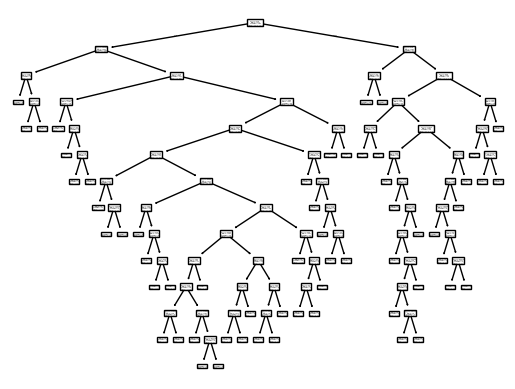

In [9]:
from sklearn.tree import plot_tree

plot_tree(entscheidungsbaum);

8. Spielen Sie mit den Hyperparametern des Entscheidungsbaumes/Decision Trees. Begrenzen Sie die Baumtiefe auf 2, 3 und 4. Was sind die wichtigsten Merkmale, die ein Überleben der Passagiere gesichert haben?

In [10]:
for baumtiefe in [2, 3, 4]:
    baum = DecisionTreeClassifier(max_depth=baumtiefe)
    baum.fit(X,y)
    score = baum.score(X,y)
    print(f'Score für eine Baumtiefe von {baumtiefe}: {score: .2f}')

Score für eine Baumtiefe von 2:  0.76
Score für eine Baumtiefe von 3:  0.80
Score für eine Baumtiefe von 4:  0.81


Tatsächlich ist der Entscheidungsbaum/Decision Tree mit einer Baumtiefe von 3 und 4 kaum besser als der mit einer Baumtiefe von 2. Wir werten daher den Entscheidungsbaum mit einer Baumtiefe von 2 aus:

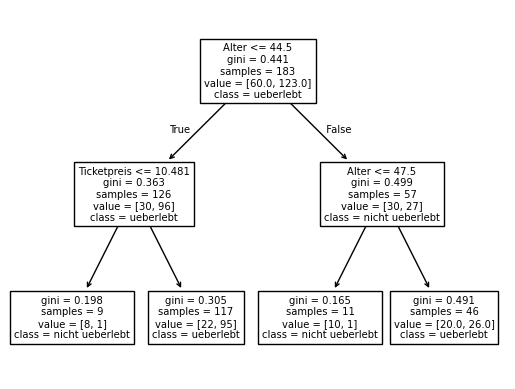

In [11]:
finales_modell = DecisionTreeClassifier(max_depth=2)
finales_modell.fit(X,y)

plot_tree(finales_modell,
    feature_names=['Klasse', 'Alter', 'Anzahl_Geschwister_Partner',	'Anzahl_Eltern_Kinder',	'Ticketpreis'],
    class_names=['nicht ueberlebt', 'ueberlebt']);


Zunächst einmal erscheint ein jüngeres Alter die Überlebenschance erhöht zu haben. Danach wirkt es so, also ob der Ticketpreis eine wichtige Rolle gepsielt haben könnte.

## Aufgabe 6.2

Der Datensatz 'diabetes.csv' ist eine Sammlung von medizinischen Daten, die vom
National Institute of Diabetes and Digestive and Kidney Diseases, erhoben
wurden, siehe
[https://www.kaggle.com/datasets/whenamancodes/predict-diabities?resource=download](https://www.kaggle.com/datasets/whenamancodes/predict-diabities?resource=download).
Bei Frauen des Pima-Stammes wurden folgende medizinische Daten erhoben:

* Pregnancies: Anzahl der Schwangerschaften
* Glucose: Glukose-Level im Blut
* BloodPressure: Messung des Blutdrucks
* SkinThickness: Dicke der Haut
* Insulin: Messung des Insulinspiegels im Blut
* BMI: Body-Maß-Index (Gewicht geteilt durch Körpergröße ins Quadrat)
* DiabetesPedigreeFunction: Wahrscheinlichkeit von Diabetes aufgrund der Familienhistorie
* Age: Alter

Enthalten ist auch, ob bei der Person Diabetes festgestellt wurde oder nicht.

* Outcome: Diabetes = 1, kein Diabetes = 0

Führen Sie eine explorative Datenanalyse (EDA) durch. Führen Sie dazu
Python-Code in Code-Zellen aus und geben Sie in Markdown-Zellen Ihre Antworten
auf die folgenden Frage an.

1. Welche Daten enthält der Datensatz? Wie viele Personen sind in der Tabelle
   enthalten? Wie viele Merkmale werden dort beschrieben?

In [ ]:
#

2. Sind die Daten vollständig?

In [ ]:
#

3. Welchen Datentyp haben die Merkmale? Welche Merkmale sind numerisch und
   welche sind kategorial?

In [ ]:
#

4. Erstellen Sie eine Übersicht der statistischen Merkmale für die numerischen
   Daten. Visualisieren Sie anschließend die statistischen Merkmale mit
   Boxplots. Interpretieren Sie die statistischen Merkmale. Gibt es Ausreißer?
   Sind die Werte plausibel?

In [ ]:
#

5. Erstellen Sie eine Scatter-Matrix mit Insulin, BMI und Outcome. Welche der
  beiden Eigeschaften Insulin oder BMI könnte ehr geeignet sein, Diabetes
  ja/nein zu prognostizieren?

In [ ]:
#

6. Visualisieren Sie Diabetes ja/nein in Abhängigkeit der gewählten Eigenschaft.
  Vermuten Sie einen Zusammenhang?

In [ ]:
#

7. Trainieren Sie mit den numerischen Merkmalen einen Entscheidungsbaum/Decision Tree.

In [ ]:
#

8. Visualisieren Sie den Entscheidungsbaum

In [ ]:
#

9. Spielen Sie mit den Hyperparametern des Entscheidungsbaumes/Decision Trees. Begrenzen Sie die Baumtiefe auf 2, 3 und 4. Was sind die wichtigsten Merkmale, die ein Überleben der Passagiere gesichert haben?

In [ ]:
#